# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load Data

In [2]:
# Create pandas dataframe from csv
df = pd.read_csv("../logs/MainLog.csv", sep=",", header=0)

# Split  synthetic/complex
df_synthetic = df[df['name'].str.match('synth')]
df_complex = df[~df['name'].str.match('synth')]

# Mean
df_mean_k = df.groupby('k_optimal').mean()
df_synthetic_mean_k = df_synthetic.groupby('k_optimal').mean()
df_complex_mean_k = df_complex.groupby('k_optimal').mean()

# Style plot
plt.style.use('default')
font = {'size' : 20}
plt.rc('font', **font)

# Print results

In [3]:

dfFalse = df[df['verified'] == False]
dfError = dfFalse[dfFalse['millis'] < 180000]
print(dfError)

numSynthetic = df_synthetic.shape[0]
dfSyntheticSolved = df_synthetic[df_synthetic['verified'] == True]
numSyntheticSolved = dfSyntheticSolved.shape[0]
print("Synthetic: " + str(numSyntheticSolved) + "/" + str(numSynthetic)
      + " (" + str(numSyntheticSolved * 100 / numSynthetic if numSynthetic else 100) + "%)")

numComplex = df_complex.shape[0]
dfComplexSolved = df_complex[df_complex['verified'] == True]
numComplexSolved = dfComplexSolved.shape[0]
print("Complex: " + str(numComplexSolved) + "/" + str(numComplex)
      + " (" + str(numComplexSolved * 100 / numComplex if numComplex else 100) + "%)")

numGeneral = df.shape[0]
dfSolved = df[df['verified'] == True]
numSolved = dfSolved.shape[0]
print("Overall: " + str(numSolved) + "/" + str(numGeneral)
      + " (" + str(numSolved * 100 / numGeneral) + "%)")

Empty DataFrame
Columns: [name, k_optimal, k_solved, millis, verified, recursive_steps]
Index: []
Synthetic: 72/90 (80.0%)
Complex: 0/0 (100%)
Overall: 72/90 (80.0%)


# BFS Comparison

                                  name  k_optimal_x  k_solved_x  millisLight  \
0         biology-n_35-m_315-p_0.75-18           15          15          499   
1          biology-n_42-m_297-p_0.5-23           21          21        10251   
2         biology-n_42-m_297-p_0.75-23           19          19        16549   
3          biology-n_49-m_689-p_0.9-14           19          19         4447   
4          biology-n_59-m_624-p_0.75-1           26          26         3871   
5                          blogs-n_200           25          25            4   
6                    GD-n_80-m_232.mtx           20          20            2   
7                    openflights-n_300           37          37            2   
8                  temporalGraph-n_700           26          26            4   
9                       ucsocial-n_200           24          24            1   
10                     usairport-n_200           29          29            2   
11   synth-n_100-m_305-k_20-p_0.05.txt  

C:\Users\lenna\AppData\Local\Temp/ipykernel_12196/1141165424.py:32: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


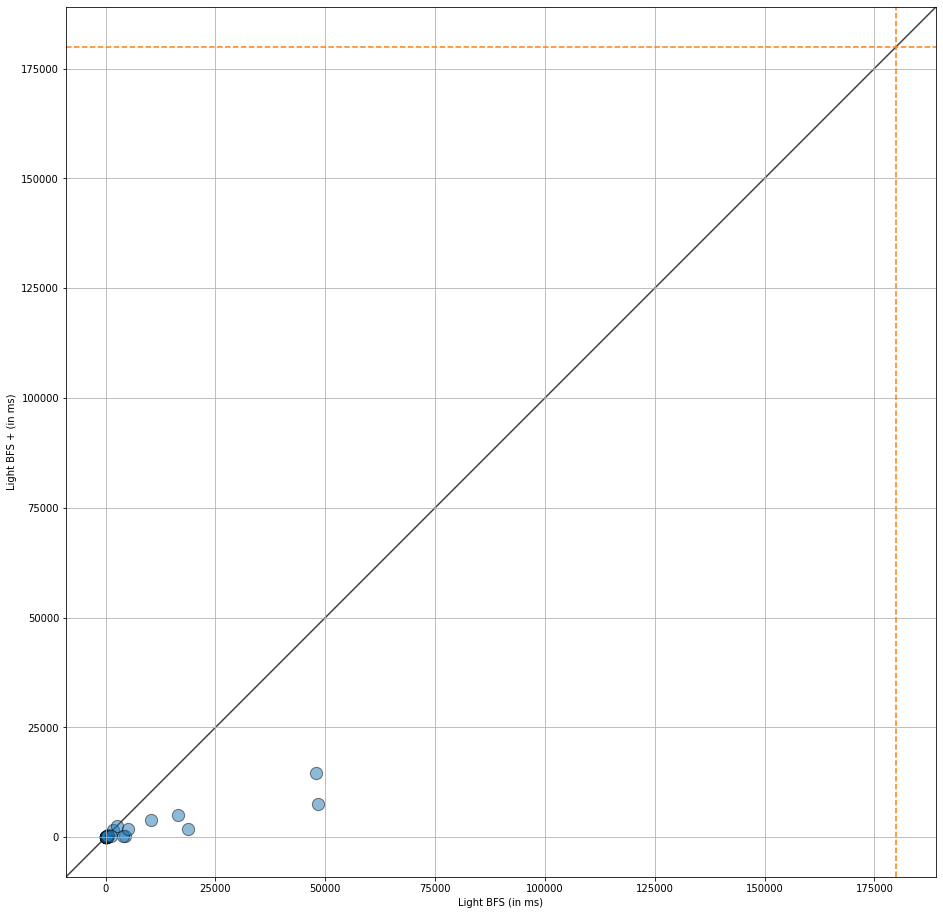

In [3]:
dfLight = pd.read_csv("../logs/MainLog-2_LightBFS_2.csv.", sep=",", header=0)
dfLight = dfLight.rename(columns={'millis': 'millisLight'})
dfFull = pd.read_csv("../logs/MainLog-2_LightBFS_3.csv", sep=",", header=0)
dfFull = dfFull.rename(columns={'millis': 'millisFull'})
dfMerge = dfLight.merge(dfFull, on = "name", how = 'inner')
print(dfMerge)


fig, ax = plt.subplots(figsize=(16,16))
ax.axhline(y=180000, color='tab:orange', linestyle='--')
ax.axvline(x=180000, color='tab:orange', linestyle='--')
ax.scatter(dfMerge['millisLight'], dfMerge['millisFull'], c='tab:blue', edgecolors='black', marker='o', alpha=0.5, s=150)
plt.xlabel('Light BFS (in ms)')
plt.ylabel('Light BFS + (in ms)')
ax.grid()


x = np.array([0,180000])
y = np.array([0,180000])
#plt.plot(x,y,'tab:orange')
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

fig.savefig('plots/BFSComparison.png',  bbox_inches='tight')
fig.show()


# Line Plot percentage over time

        k_optimal   k_solved  verified  percentage_solved
millis                                                   
0        4.364341   4.364341       1.0           0.000000
1       12.148148  12.148148       1.0          19.515885
2        9.153846   9.153846       1.0          23.600605
3       14.461538  14.461538       1.0          25.567322
4        7.500000   7.500000       1.0          27.534039
...           ...        ...       ...                ...
136980  37.000000  37.000000       1.0          67.927383
145977  15.000000  15.000000       1.0          68.078669
160318  15.000000  15.000000       1.0          68.229955
175195  14.000000  14.000000       1.0          68.381241
176954  20.000000  20.000000       1.0          68.532526

[221 rows x 4 columns]


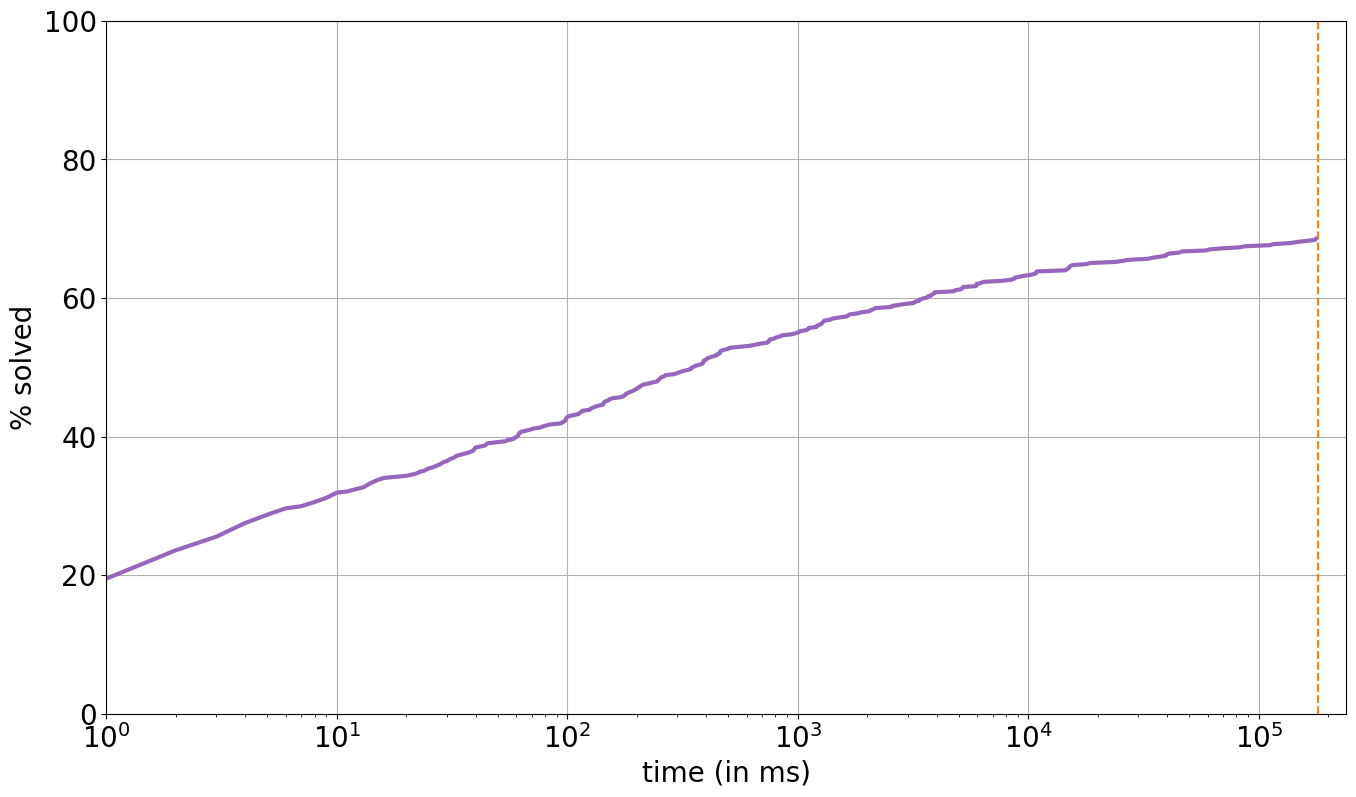

In [42]:
dfPercentage = df[df['millis'] < 180000].groupby('millis').mean()
dfPercentage['percentage_solved'] = 0.0

for index, row in dfPercentage.iterrows():
    dfPercentage.at[index, 'percentage_solved'] = df[df['millis'] < index].shape[0] / df.shape[0] * 100

print(dfPercentage)


plt.figure(figsize=(16,9))
plt.axvline(x=180000, color='tab:orange', linestyle='--')
plt.plot(dfPercentage['percentage_solved'], c='tab:purple', linewidth='3')
plt.xlabel('time (in ms)')
plt.ylabel('% solved')
plt.title('')
plt.ylim([0, 100])
plt.xlim([1, 240000])
plt.gca().set_xscale('log')
plt.grid()
plt.savefig('plots/PercentageLinePlot.png',  bbox_inches='tight')
plt.show()

# Scatter Plot k

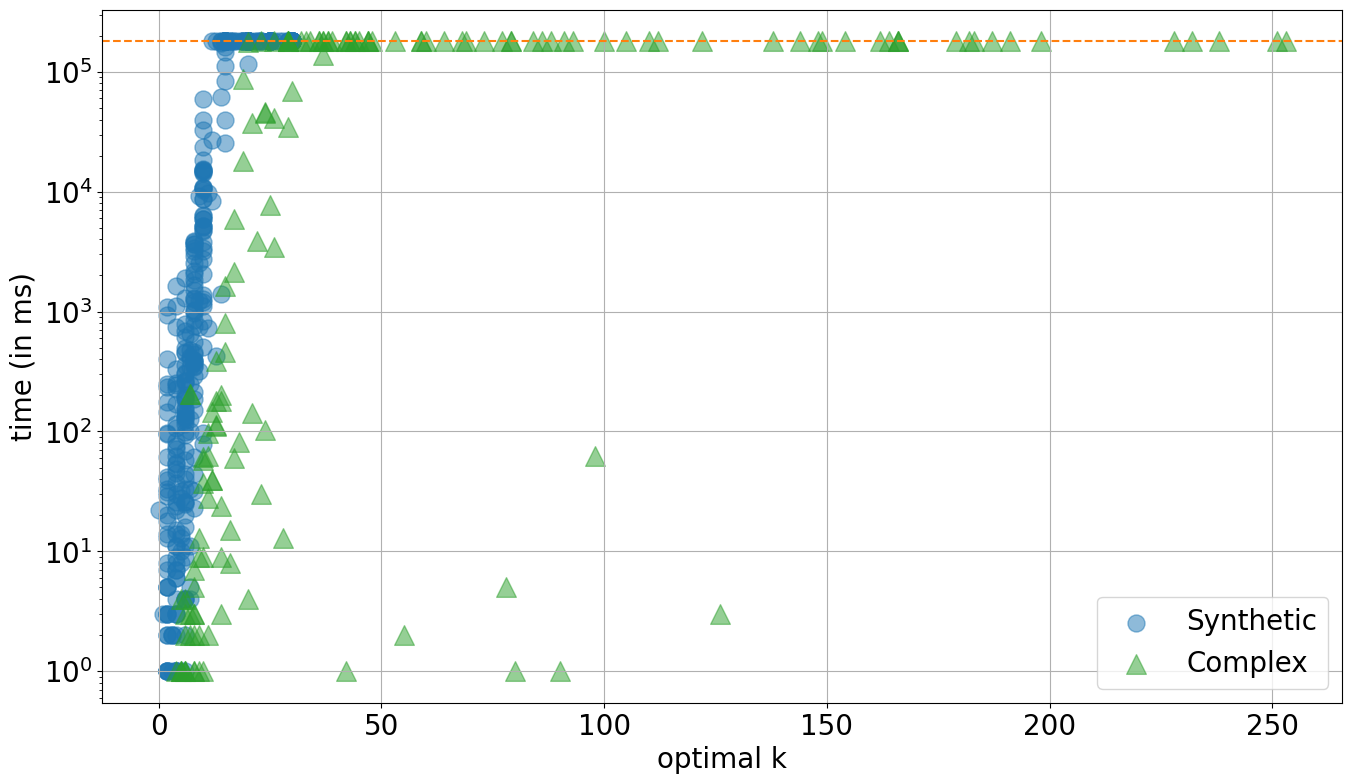

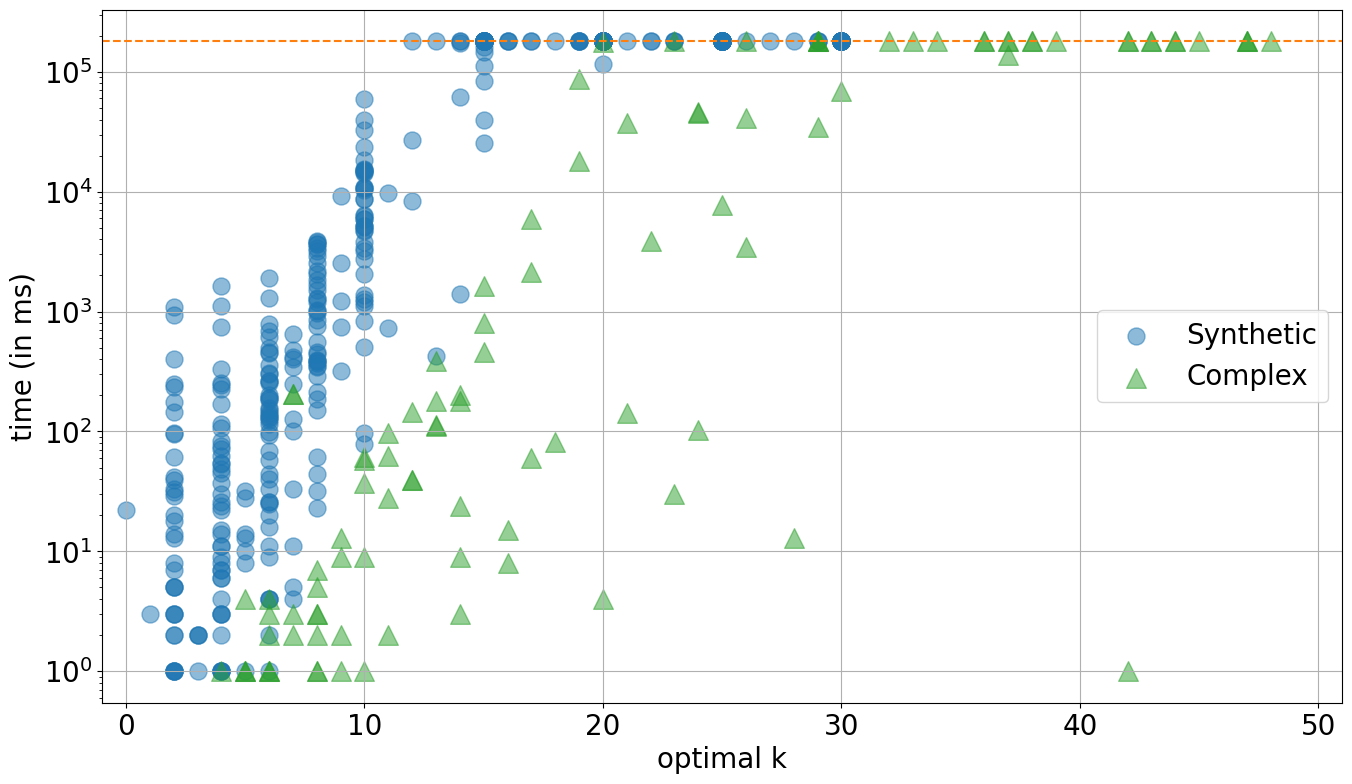

In [43]:
plt.figure(figsize=(16,9))
plt.axhline(y=180000, color='tab:orange', linestyle='--')
plt.scatter(df_synthetic['k_optimal'], df_synthetic['millis'], c='tab:blue', marker='o', alpha=0.5, s=150, label='Synthetic')
plt.scatter(df_complex['k_optimal'], df_complex['millis'], c='tab:green', marker='^', alpha=0.5, s=200, label='Complex')
plt.gca().set_yscale('log')
plt.xlabel('optimal k')
plt.ylabel('time (in ms)')
plt.legend()
plt.grid()
plt.savefig('plots/SyntheticComplexScatterPlot_1.png',  bbox_inches='tight')
plt.show()

plt.figure(figsize=(16,9))
plt.axhline(y=180000, color='tab:orange', linestyle='--')
plt.scatter(df_synthetic['k_optimal'], df_synthetic['millis'], c='tab:blue', marker='o', alpha=0.5, s=150, label='Synthetic')
plt.scatter(df_complex['k_optimal'], df_complex['millis'], c='tab:green', marker='^', alpha=0.5, s=200, label='Complex')
plt.gca().set_yscale('log')
plt.xlabel('optimal k')
plt.ylabel('time (in ms)')
plt.legend()
plt.grid()
plt.xlim([-1, 51])
plt.savefig('plots/SyntheticComplexScatterPlot_2.png',  bbox_inches='tight')
plt.show()